# CS 7641 - HW2 Randomized Optimization

## Part 1
Implement four local random search algorithms
- randomized hill climbing
- simulated annealing
- genetic algorithm
- MIMIC

Create (for sufficiently loose values of "create" including "steal", though it's fairly easy to come up with simple problems on your own in this case) three optimization problem domains. For the purpose of this assignment an "optimization problem" is just a fitness function one is trying to maximize (as opposed to a cost function one is trying to minimize). This choice doesn't make things easier or harder, but picking one over the other makes things easier for us to grade.

Please note that the problems you create should be over discrete-valued parameter spaces. Bit strings are preferable.

You will apply all four search techniques to these three optimization problems. 
The first problem should highlight advantages of your genetic algorithm, the second of simulated annealing, and the third of MIMIC. Be creative and thoughtful. It is not required that the problems be complicated or painful. They can be simple. For example, the 4-peaks and k-color problems are rather straightforward, but illustrate relative strengths rather neatly.

## Part 2

Use the first three algorithms to find good weights for a neural network. 

In particular, you will use them instead of backprop for the neural network you used in assignment #1 on at least one of the problems you created for assignment #1. Notice that this assignment is about an optimization problem and about supervised learning problems. That probably means that looking at only the loss or only the accuracy won’t tell you the whole story. Luckily, you have already learned how to write an analysis on optimization problems and on supervised learning problems; now you just have to integrate your knowledge.

Some pitfalls you might run into:
1. The weights in a neural network are continuous and real-valued instead of discrete so you might want to think a little bit about what it means to apply these sorts of algorithms in such a domain.
2. There are different loss and activation functions for NNs. If you use different libraries across your assignments, you need to make sure those are the same. For example, if you used scikit-learn and don’t modify the ABAGAIL example, they are not.



In [107]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import mlrose_hiive


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [156]:
def run_four_optimizations(fitness, problem, num_max_attempts = 100):
    running_time_dict = {'random_hill_climb':0
                        ,'simulated_annealing':0
                        , 'genetic_alg':0
                        , 'mimic':0}
    for i in running_time_dict.keys():
        print(i)
        start_time = time.time()
        if i == 'random_hill_climb':
            best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, 
                                                                        max_attempts = 200, 
                                                                        max_iters=100, 
                                                                        curve=True, 
                                                                        random_state=1,
                                                                        )
        elif i == 'simulated_annealing':
            best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, 
                                                                        max_attempts = 200, 
                                                                        max_iters=100, 
                                                                        curve=True, 
                                                                        random_state=1,
                                                                        )
        elif i == 'genetic_alg':
            best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, 
                                                                        max_attempts = 200, 
                                                                        max_iters=100, 
                                                                        curve=True, 
                                                                        random_state=1,
                                                                        )
        else:
            best_state, best_fitness, fitness_curve = mlrose.mimic(problem, 
                                                                        max_attempts = 200, 
                                                                        max_iters=100, 
                                                                        curve=True, 
                                                                        random_state=1,
                                                                        )

        end_time = time.time()
        running_time_dict[i] = end_time - start_time
        plt.plot(fitness_curve, label=i)

    plt.legend()
    plt.xlabel('Iterations')
    plt.ylabel('Fitness Value')
    plt.show()
    print(running_time_dict)

## Part 1 - Four Peaks Problem

random_hill_climb
simulated_annealing
genetic_alg
mimic


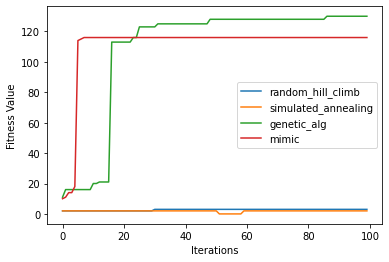

{'random_hill_climb': 0.002975940704345703, 'simulated_annealing': 0.002122163772583008, 'genetic_alg': 0.5683588981628418, 'mimic': 132.7396821975708}


In [155]:
fitness = mlrose_hiive.FourPeaks()
problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)
run_four_optimizations(fitness, problem)

## Part 1 - Six Peaks Problem

random_hill_climb
simulated_annealing
genetic_alg
mimic


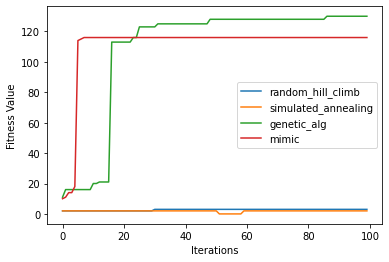

{'random_hill_climb': 0.003571033477783203, 'simulated_annealing': 0.003529787063598633, 'genetic_alg': 0.5714139938354492, 'mimic': 132.22858023643494}


In [142]:
fitness = mlrose_hiive.SixPeaks()
problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)
run_four_optimizations(fitness, problem)

## Part 1 - One Max Problem


random_hill_climb
simulated_annealing
genetic_alg
mimic


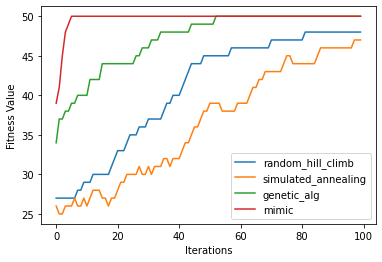

{'random_hill_climb': 0.00494694709777832, 'simulated_annealing': 0.002343893051147461, 'genetic_alg': 0.5103769302368164, 'mimic': 32.278321981430054}


In [135]:
fitness = mlrose_hiive.OneMax()
problem = mlrose_hiive.DiscreteOpt(length=50, fitness_fn=fitness, maximize=True)
run_four_optimizations(fitness, problem)

random_hill_climb
simulated_annealing
genetic_alg
mimic


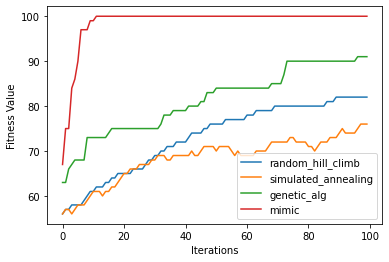

{'random_hill_climb': 0.0009379386901855469, 'simulated_annealing': 0.0013039112091064453, 'genetic_alg': 0.513746976852417, 'mimic': 131.64215445518494}


In [143]:
fitness = mlrose_hiive.OneMax()
problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)
run_four_optimizations(fitness, problem)

## Part 1 - Continuous Peaks


random_hill_climb
simulated_annealing
genetic_alg
mimic


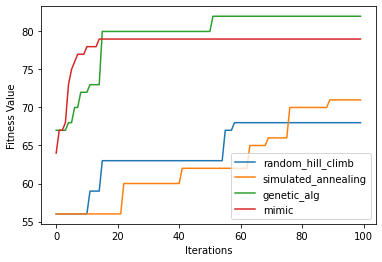

{'random_hill_climb': 0.008172035217285156, 'simulated_annealing': 0.0059392452239990234, 'genetic_alg': 0.7191019058227539, 'mimic': 32.89582180976868}


In [137]:
fitness = mlrose_hiive.ContinuousPeaks()
problem = mlrose_hiive.DiscreteOpt(length=50, fitness_fn=fitness, maximize=True)
run_four_optimizations(fitness, problem)

random_hill_climb
simulated_annealing
genetic_alg
mimic


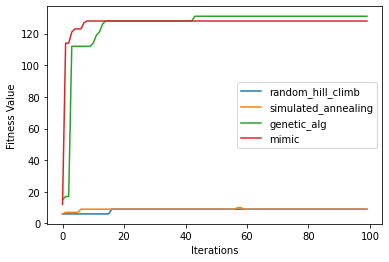

{'random_hill_climb': 0.0033521652221679688, 'simulated_annealing': 0.005707979202270508, 'genetic_alg': 0.9434502124786377, 'mimic': 132.7281939983368}


In [144]:
fitness = mlrose_hiive.ContinuousPeaks()
problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)
run_four_optimizations(fitness, problem)

## Part 1 - N-Queens


random_hill_climb
simulated_annealing
genetic_alg
mimic


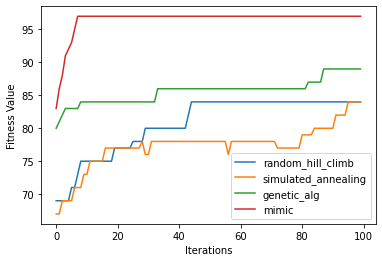

{'random_hill_climb': 0.0490269660949707, 'simulated_annealing': 0.06871390342712402, 'genetic_alg': 8.607438087463379, 'mimic': 40.77800393104553}


In [138]:
fitness = mlrose_hiive.Queens()
problem = mlrose_hiive.DiscreteOpt(length=50, fitness_fn=fitness, maximize=True)
run_four_optimizations(fitness, problem)

random_hill_climb
simulated_annealing
genetic_alg
mimic


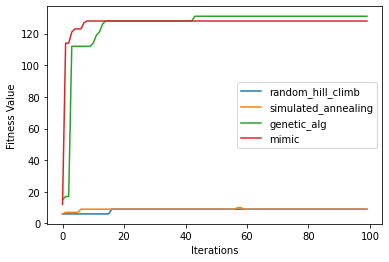

{'random_hill_climb': 0.0030951499938964844, 'simulated_annealing': 0.005631923675537109, 'genetic_alg': 0.9446759223937988, 'mimic': 134.44918298721313}


In [145]:
fitness = mlrose_hiive.ContinuousPeaks()
problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)
run_four_optimizations(fitness, problem)

random_hill_climb
simulated_annealing
genetic_alg
mimic


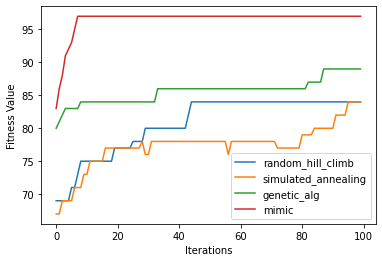

{'random_hill_climb': 0.048219919204711914, 'simulated_annealing': 0.06882786750793457, 'genetic_alg': 8.616060972213745, 'mimic': 40.625391244888306}


In [161]:
fitness = mlrose_hiive.Queens()
problem = mlrose_hiive.DiscreteOpt(length=50, fitness_fn=fitness, maximize=True)
run_four_optimizations(fitness, problem)

## Part 2 